In [2]:

# Import des librairies
import pandas as pd
import blpapi
from datetime import datetime
import numpy as np
import os
from sklearn import datasets, linear_model, metrics
import matplotlib.pyplot as plt
import yfinance as yf


In [34]:
def linear_regression (symbols,names, start, end) :
    """
    symbols (list): tickers yahoo des actifs que l'on veut analyser
    names (list): nom des actifs 
    start (str) : date de début au format YYYY-MM-DD
    end (str) : date de fin au format YYYY-MM-DD
    
    """
    data = yf.download(symbols, start = start, end = end)
    
    prices = data["Close"]
    #prices = prices.fillna(method='ffill')
    prices = prices.dropna()
    x =prices[symbols[0]].values
    y =prices[symbols[1]].values

    # On génère un array pour les prix de chaque actif

    x = x.reshape(len(x), 1)
    y = y.reshape(len(y), 1)


    # On utilise la méthode des moindres carrés ordinaire pour obtenir une régression linéaire 
    regr = linear_model.LinearRegression()
    regr.fit(x, y)
    prediction = regr.predict(x)

    # Calcul du coefficient de corrélation linéaire R^2
    SS_Residual = sum((y-prediction)**2)       
    SS_Total = sum((y-np.mean(y))**2)     
    r_squared = 1 - (float(SS_Residual))/SS_Total
    r_squared = r_squared[0]
    adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1)


    # graphique
    plt.figure(figsize=(10,10))
    a = plt.scatter(x, y, s = 15, alpha=0.5)
    b = plt.scatter(x[len(x)-1], y[len(y)-1], s = 90, color = 'purple', marker = '^')
    c = plt.plot(x, prediction, color='red', linewidth=2)

    plt.xlabel(names[0])
    plt.ylabel(names[1])
    plt.legend((a,b),('Prix', 'Derniers prix'))
    #On ajoute au graphique le coefficient de corrélation linéaire
    plt.annotate('R^2 ajusté: {}'.format(round(adjusted_r_squared,3)),
                (x[int(len(x)/1.5)], prediction[int(len(x)/3)]))
    plt.show()



[*********************100%***********************]  2 of 2 completed


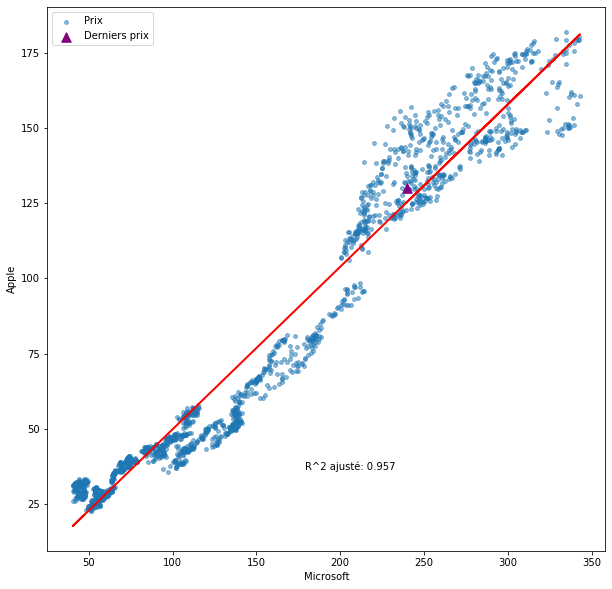

In [37]:
linear_regression (symbols= ["MSFT", "AAPL"],names = ["Microsoft", "Apple"], start="2015-01-01", end="2022-12-31") 